# Introduction

(Last updated: Jun 12, 2024)


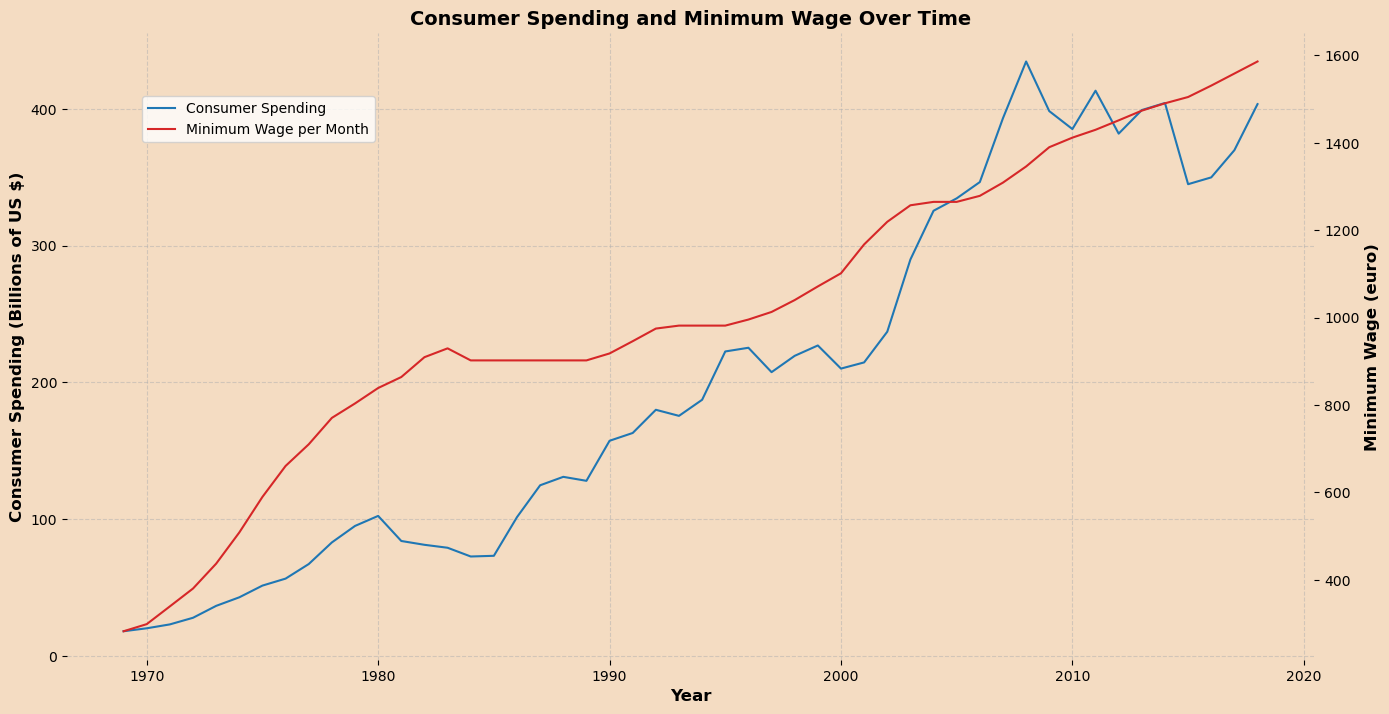

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

# Remove the last 6 characters from the 'year' column in the second dataset
consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]

# Convert 'year' column to integers in both datasets
minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

# Merge the datasets on 'year'
merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Set the background color of the figure and axes
fig.patch.set_facecolor('#f4dcc2')
ax1.set_facecolor('#f4dcc2')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Plot Consumer Spending on the left y-axis
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Consumer Spending (Billions of US $)', color='black', fontsize=12, fontweight='bold')
ax1.plot(merged_df['year'], merged_df[' Billions of US $'], color='tab:blue', label='Consumer Spending')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', colors='black')

# Add grid to ax1
ax1.grid(True, linestyle='--', alpha=0.5)

# Create a second y-axis to plot the Minimum Wage
ax2 = ax1.twinx()
ax2.set_facecolor('#f4dcc2')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('Minimum Wage (euro)', color='black', fontsize=12, fontweight='bold')
ax2.plot(merged_df['year'], merged_df['minimum wage per month (euro)'], color='tab:red', label='Minimum Wage per Month')
ax2.tick_params(axis='y', labelcolor='black')

# Adding titles and labels
plt.title('Consumer Spending and Minimum Wage Over Time', fontsize=14, fontweight='bold')

# Show the legend
fig.tight_layout()  # Ensure the plot fits well
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Adjust layout to make room for the legend
fig.subplots_adjust(top=0.98)

# Display the plot
plt.show()

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('wages.csv', delimiter=';')

# Extract relevant columns for plotting
# We'll use columns for jobs at or below the minimum wage
# And rows for different age categories

# Select rows for age categories and relevant columns for number of people earning minimum wage
# Assuming 'Leeftijd' is the Dutch term for 'Age'
age_categories = df[df.iloc[:, 0].str.startswith('Leeftijd')].iloc[:, [0, 1]]

# Extract the amount of people earning the minimum wage and convert to numeric
people_count = age_categories.iloc[:, 2].apply(lambda x: float(x.replace(',', '.')))

# Extract age categories
age_labels = age_categories.iloc[:, 0].str.split(': ').str[1]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(age_labels, people_count, color='skyblue')  # Adjust color as desired

plt.xlabel('Number of People Earning Minimum Wage (in thousands)')
plt.ylabel('Age Categories')
plt.title('Number of People Earning Minimum Wage by Age Category')

plt.gca().invert_yaxis()  # Invert y-axis to have the youngest at the top

plt.tight_layout()
plt.show()


IndexError: single positional indexer is out-of-bounds